# PHYS591000 in 2022
# Lab 07
---
## Goal 
In lab 07, we will practice regularization and hyperparameter tuning:

* Regularization: Dropout, Early-stopping, l1 or l2 Regularizer
* Optimization: KerasTuner

and how to apply these method on Dense Neural Network which is the architecture in Week06.


## Introduction

We will still take a W/Z jets v.s Quark jets to be an example, like Week06.

The W/Z jets images are labeled to `0` and quark jets images are labeled to `1`.

For Dense Neural Network, you need reshape images from (1,40,40) to (1600,).

[Keras](https://keras.io) is a friendly package for beginner. You can easily build a sequential architecture for training.

---
* **Data Desctiption:**

In the `Train_1_channel`, `Validation_1_channel` and `Test_1_channel` folders, we have training, validation and test images data set in image base, respectively. 

In each folder, there is an dictionary file (e.g. `test_dict.csv` in `Test_1_channel`) to record the **PATH** and **label** for each image.

We have two kinds of images. One is W/Z jet image. The other is quark jet image.  
They are 1-channel images made by charged transverse momentum.   
The W/Z jets are labeled to `0` and quark jets images are labeled to `1`.

Each jet is clustered by anti-kt algorithm with R=0.8 and transverse momentum is greater than 200 GeV.  
The resolution for jet image is 40X40 pixels and in 1.5RX1.5R range.   
Then, we align the jet axis. 
They are also passed prerocessing: normalized and standardized.  
For further detail, you can find in references.

---
* **Learning Curves**

The week, we rely on learning curves to judge how healthy our model is.
Learning curves can show that our model is overfitting, underfitting or healthy.

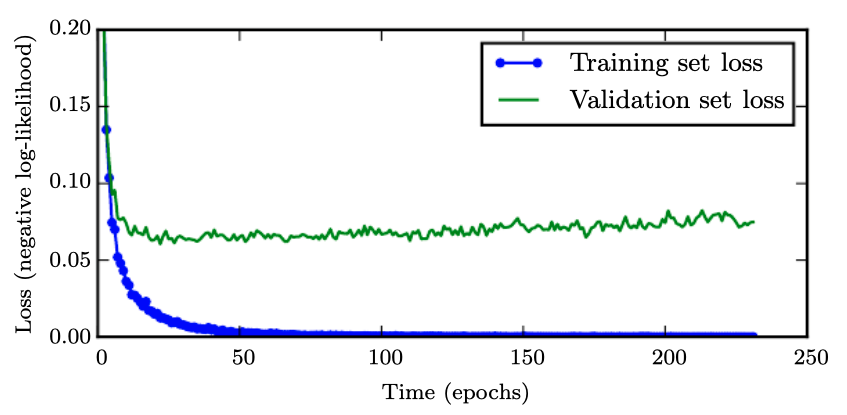


Resource: [Deep Learning: Chapter 7](https://www.deeplearningbook.org/contents/regularization.html)



---

> **Reference**   
> 1. [Disentangling Boosted Higgs Boson Production Modes with Machine Learning](https://arxiv.org/abs/2009.05930)  
> 2. [Boosting H→bb¯ with Machine Learning](https://arxiv.org/abs/1807.10768)
> 3. [Jet Algorithm](https://arxiv.org/pdf/1302.0260.pdf)
> 4. [Deep Learning: Chapter 7 Regularization for Deep Learning](https://www.deeplearningbook.org/contents/regularization.html)
> 5. [Keras.io](https://keras.io)
> 6. [Regularizers Keras api](https://keras.io/api/layers/regularizers/)
> 7. [Dropout Keras api](https://keras.io/api/layers/regularization_layers/dropout/)
> 8. [Dropout Regularization in Deep Learning Models With Keras](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)
> 9. [Early Stopping in Wiki](https://en.wikipedia.org/wiki/Early_stopping)
> 10. [A Gentle Introduction to Early Stopping to Avoid Overtraining Neural Networks](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/)
> 11. [KerasTuner](https://keras.io/keras_tuner/)
> 12. [KerasTuner: Getting started with KerasTuner](https://keras.io/guides/keras_tuner/getting_started/)
> 13. [Tensorflow: Introduction to the Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner)
> 14. [Keras Tuner Example Note](https://deepnote.com/@svpino/Keras-Tuner-z31YNDzcSQKAqJGZSqTDPQ)



## Workflow:
 
   **i**. Loading the Training Data  
   **ii**. Building a DNN model which contains (Flatten() -> Dense(256) -> Dense(128) -> Dense(64) -> Dense(1))  
           * Here, we use **Flatten()** to reshape our image from (40,40) to (1600,)    
   **iii**. Training the DNN model (model.fit(X,Y))   
   **iv**. Saving the trained model (model.save("./model.h5"))   
   **v**. Making the learning curve figure.  
   **vi**. Loading model (load_model("./model.h5"))  
   **vii**. Applying model on Test Data and evaluating performance based on ROC and AUC   
   **viii**. Test different regularization methods and KerasTuner, and then repeat **ii** to **vii** to study performance. 

---

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
from tqdm import tqdm
%config InlineBackend. figure_format = 'retina'


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname in os.listdir('/kaggle/input/phys591000-2022-week07/'):
    print(dirname,"/")
    for filename in os.listdir('/kaggle/input/phys591000-2022-week07/'+ dirname):
        print(filename)
    print("\n")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Test_1_channel /
Jet_Images_1
test_dict.csv


Train_1_channel /
Jet_Images_1
Jet_Images_6
Jet_Images_7
Jet_Images_5
Jet_Images_4
train_dict.csv
Jet_Images_2
Jet_Images_3


Validation_1_channel /
Jet_Images_1
val_dict.csv




---

### 1.0 Load Data and Preprocessing

* We will load data and label in the  `Train_1_channel`, `Validation_1_channel` and `Test_1_channel` folders.
* Please load top 10,000 data in `Train_1_channel` folder.
* Please load top 1,000 data in `Validation_1_channel` folder.
* Please load top 1,000 data in `Test_1_channel` folder.

**This part is the same as last week, so please just run this cell to collect training, validation and test dataset.**



In [5]:
##############################################################################
# Code for 1.0
##############################################################################
"""
Declare a common path
"""
path  = "/kaggle/input/phys591000-2022-week07/"


def load_dic(file_path: str)-> pd.DataFrame:

        dict_file = pd.read_csv(file_path)
        print("\n")
        print("Top 10 event infomation")
        print(dict_file.head(10))

        return dict_file

"""
Load a dictionary: "train_dict.csv" in the "Train_1_channel" folder.
"""
train_dict = load_dic(path + "/Train_1_channel/train_dict.csv")

"""
Load a dictionary: "val_dict.csv" in the "Validation_1_channel" folder.
"""
val_dict = load_dic(path + "/Validation_1_channel/val_dict.csv")

"""
Load a dictionary: "test_dict.csv" in the "Test_1_channel" folder.
"""
test_dict = load_dic(path + "/Test_1_channel/test_dict.csv")



def load_data(dict_file: pd.DataFrame, N: int, data_folder_name: str)-> np.array:
        """
        collect N jet images and labels based on a dictionary: "dict_file" in a folder: "data_folder_name" into two numpy arrays: X, Y
        """
        jet_img = []
        for i in tqdm(range(N)):
                x_jet_path = path + "/" +str(data_folder_name)+ "/" + dict_file["Jet_Images"][i]
                x_jet_tmp = np.load(x_jet_path)["jet_images"]
                jet_img.append(x_jet_tmp)

        X = np.array(jet_img) 
        Y = dict_file["Y"][:N]
        
        time.sleep(1)

        return X, Y

x_train_jet, target_train = load_data(train_dict, 10000, "Train_1_channel")

x_val_jet, target_val = load_data(val_dict, 1000, "Validation_1_channel")

x_test_jet, target_test = load_data(test_dict, 1000, "Test_1_channel")


"""
Check statistic balance for data
"""
print("\n")
print("There are {} W/Z jets in the training data set.".format(len(target_train[target_train==0])))
print("There are {} quark jets in the training data set.".format(len(target_train[target_train==1])))


print("\n")
print("There are {} W/Z jets in the validation data set.".format(len(target_val[target_val==0])))
print("There are {} quark jets in the validation data set.".format(len(target_val[target_val==1])))

print("\n")
print("There are {} W/Z jetsin the test data set.".format(len(target_test[target_test==0])))
print("There are {} quark jets in the test data set.".format(len(target_test[target_test==1])))

##############################################################################



Top 10 event infomation
                        Jet_Images  Y
0   Jet_Images_1/x_train_jet_1.npz  1
1   Jet_Images_1/x_train_jet_2.npz  0
2   Jet_Images_1/x_train_jet_3.npz  1
3   Jet_Images_1/x_train_jet_4.npz  1
4   Jet_Images_1/x_train_jet_5.npz  0
5   Jet_Images_1/x_train_jet_6.npz  1
6   Jet_Images_1/x_train_jet_7.npz  1
7   Jet_Images_1/x_train_jet_8.npz  1
8   Jet_Images_1/x_train_jet_9.npz  1
9  Jet_Images_1/x_train_jet_10.npz  1


Top 10 event infomation
                      Jet_Images  Y
0   Jet_Images_1/x_val_jet_1.npz  0
1   Jet_Images_1/x_val_jet_2.npz  1
2   Jet_Images_1/x_val_jet_3.npz  1
3   Jet_Images_1/x_val_jet_4.npz  0
4   Jet_Images_1/x_val_jet_5.npz  0
5   Jet_Images_1/x_val_jet_6.npz  0
6   Jet_Images_1/x_val_jet_7.npz  1
7   Jet_Images_1/x_val_jet_8.npz  1
8   Jet_Images_1/x_val_jet_9.npz  1
9  Jet_Images_1/x_val_jet_10.npz  1


Top 10 event infomation
                       Jet_Images  Y
0   Jet_Images_1/x_test_jet_1.npz  0
1   Jet_Images_1/x_test_jet_2.npz 

100%|██████████| 1000/1000 [00:04<00:00, 249.15it/s]




There are 4918 W/Z jets in the training data set.
There are 5082 quark jets in the training data set.


There are 503 W/Z jets in the validation data set.
There are 497 quark jets in the validation data set.


There are 512 W/Z jetsin the test data set.
There are 488 quark jets in the test data set.


---

###  1.1

***NOTE: You should import any package you need in this cell***   
***e.g.***    
```
import tensorflow as tf
import tensorflow.keras as keras
........
```
---
Bulid a DNN Architecture and Training

* Please create a DNN architecture with 3 hidden layers and 1 output layer.
    * There are 256 neurons in the first hidden layer, 128 neurons in the second hidden layer and 64 neurons in the third hidden layer
    * In the output layer, there is 1 neurons.
    * input_shape = (1,40,40) -> (Flatten() -> Dense(256) -> Dense(128) -> Dense(64) -> Dense(1))  
    * Here, we use **Flatten()** to reshape our image from (40,40) to (1600,) 

* **RELU** will be activation function for each hidden layer, and **sigmoid** will be the activation function for output layer.
* `Adadelta` will be the optimizer and `binary_crossentropy` will be the loss function.
* Please visualize or print your Architecture.
* Please train your DNN model with `batch_size=512` and `epochs=500`.
    * x = x_train_jet, 
    * y = target_train,
    * validation_data= (x_val_jet, target_val)
* Please save your model and name it to be `model_DNN.h5`.

[Ref: Keras.io](https://keras.io)   
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref: Tutorial: first neural network python keras](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)    
[Ref: TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)      
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Ref: Keras Model Training API](https://keras.io/api/models/model_training_apis/)     
[Ref: Keras Model Training API: fit method](https://keras.io/api/models/model_training_apis/#fit-method)   
[Ref: Save and load Keras models](https://keras.io/api/models/model_saving_apis/)    
[Ref: Sigmoid function in Wiki](https://en.wikipedia.org/wiki/Sigmoid_function)   
[Ref: Adadelta Keras api ](https://keras.io/api/optimizers/adadelta/)   
[Ref: Binary Crossentropy Keras api ](https://keras.io/api/losses/probabilistic_losses/)   
[Ref: Cross Entropy in Wiki](https://en.wikipedia.org/wiki/Cross_entropy)    


2022-03-30 06:38:54.740748: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 06:38:54.847914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 06:38:54.848649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 06:38:54.849835: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
None


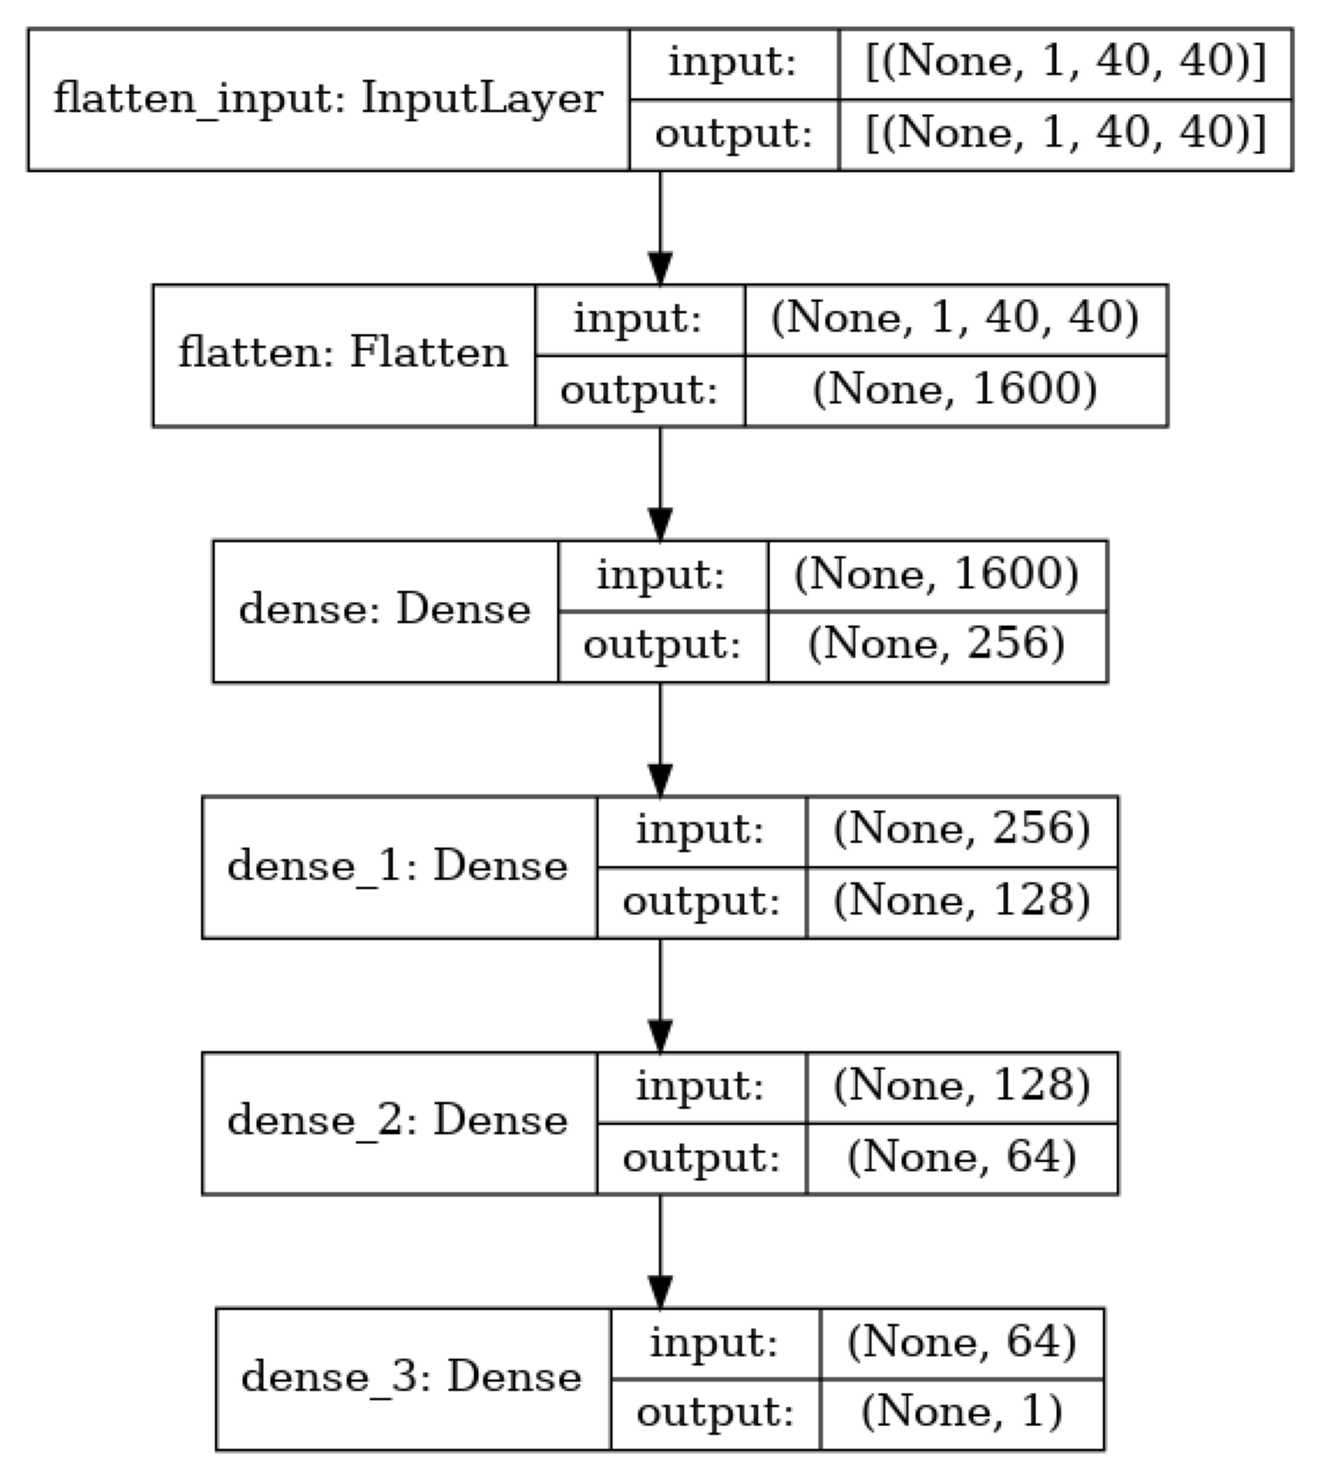

2022-03-30 06:38:58.880173: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
20/20 [==============================] - 2s 14ms/step - loss: 0.6957 - accuracy: 0.4850 - val_loss: 0.6867 - val_accuracy: 0.5040
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.4863 - val_loss: 0.6865 - val_accuracy: 0.5050
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.4867 - val_loss: 0.6864 - val_accuracy: 0.5060
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.4869 - val_loss: 0.6862 - val_accuracy: 0.5060
Epoch 5/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.4872 - val_loss: 0.6861 - val_accuracy: 0.5070
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.4882 - val_loss: 0.6860 - val_accuracy: 0.5070
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4885 - val_loss: 0.6858 - val_accuracy: 0.5090
Epoch 8/500


In [6]:
%%time
##############################################################################
# Code for 1.1
# 
##############################################################################
# Please code in this cell


"""
Import TensorFlow Packages
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.optimizers import Adadelta
from keras.utils.vis_utils import plot_model
import matplotlib.image as img

"""
Define Model 
"""
model = Sequential()
model.add(Flatten(input_shape=(1,40,40)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])



"""
Print Architecture
"""
print(model.summary())
fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('model_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()


"""
Model Training
"""
rec = model.fit(x_train_jet, target_train, epochs=500, batch_size=512,
                validation_data=(x_val_jet, target_val))

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_train_jet, target_train)))
print('Performance (target)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_val_jet, target_val)))    



"""
Save Model
"""
model.save("model_DNN.h5")

##############################################################################

---

### 1.2

Learning Curve

* Please make a learning curve of the DNN from 1.1
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

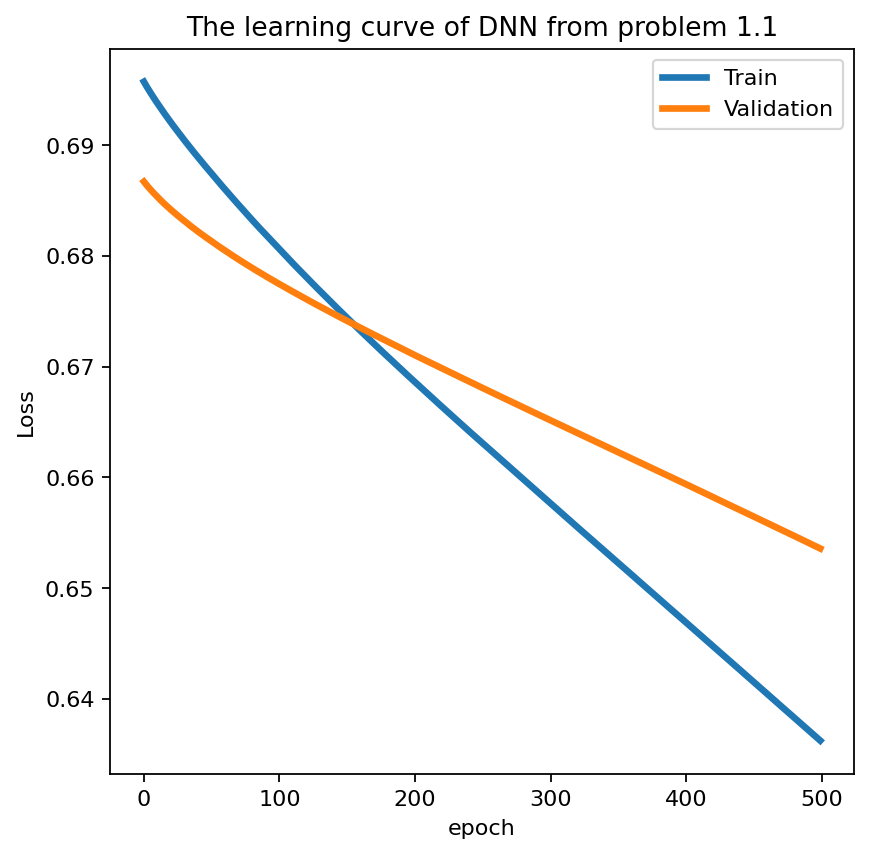

In [7]:
#############################################################################
# Code for 1.2
# 
#############################################################################
# Please code in this cell

# Plot showing the evolution of loss and accuracy, comparing the training and the test samples.
fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of DNN from problem 1.1")
plt.plot(rec.history['loss'], lw=3, label='Train')
plt.plot(rec.history['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#############################################################################

---

### 1.3
***NOTE: You should import any package you need in this cell***  

**In the previous cell, you may see overtaining issue. In this cell, we will use Early-Stopping to prevent overtaining.   
We will stop training before the model goes to be overtaining.
**

* The model architecture is the same as cell 1.1.
* Please use Keras api `callbacks` to implement `Early-Stopping `, `CSVLogger`, `ModelCheckpoint`.
    * you should follow [Ref: Example](https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966)  to learn how to use `callbacks`  
    * for `Early-Stopping`, please let
        * monitor="val_loss"
        * min_delta=0.005
        * patience=20
        * mode="auto"
        * baseline=None
        * restore_best_weights=False
    * for `CSVLogger`
        * CSVLogger("./early_stopping_log.csv")
        
    * for `ModelCheckpoint`, please let
        * filepath= "./modelcheckpoint_early_stopping.h5
        * save_best_only=True
        * verbose=1
        
* Train this architecture again.
    * let batch_size and epochs be the same as cell 1.1
    
* Please save your model and name it to be `model_DNN_early_stopping.h5`.
   

[Ref: Callbacks Keras api](https://keras.io/api/callbacks/)  
[Ref: Early Stopping in Wiki](https://en.wikipedia.org/wiki/Early_stopping)  
[Ref: A Gentle Introduction to Early Stopping to Avoid Overtraining Neural Networks](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/)  
[Ref: CSVLogger Keras api](https://keras.io/api/callbacks/csv_logger/)  
[Ref: ModelCheckpoint Keras api](https://keras.io/api/callbacks/model_checkpoint/)  
[Ref: Example](https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966)  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
None


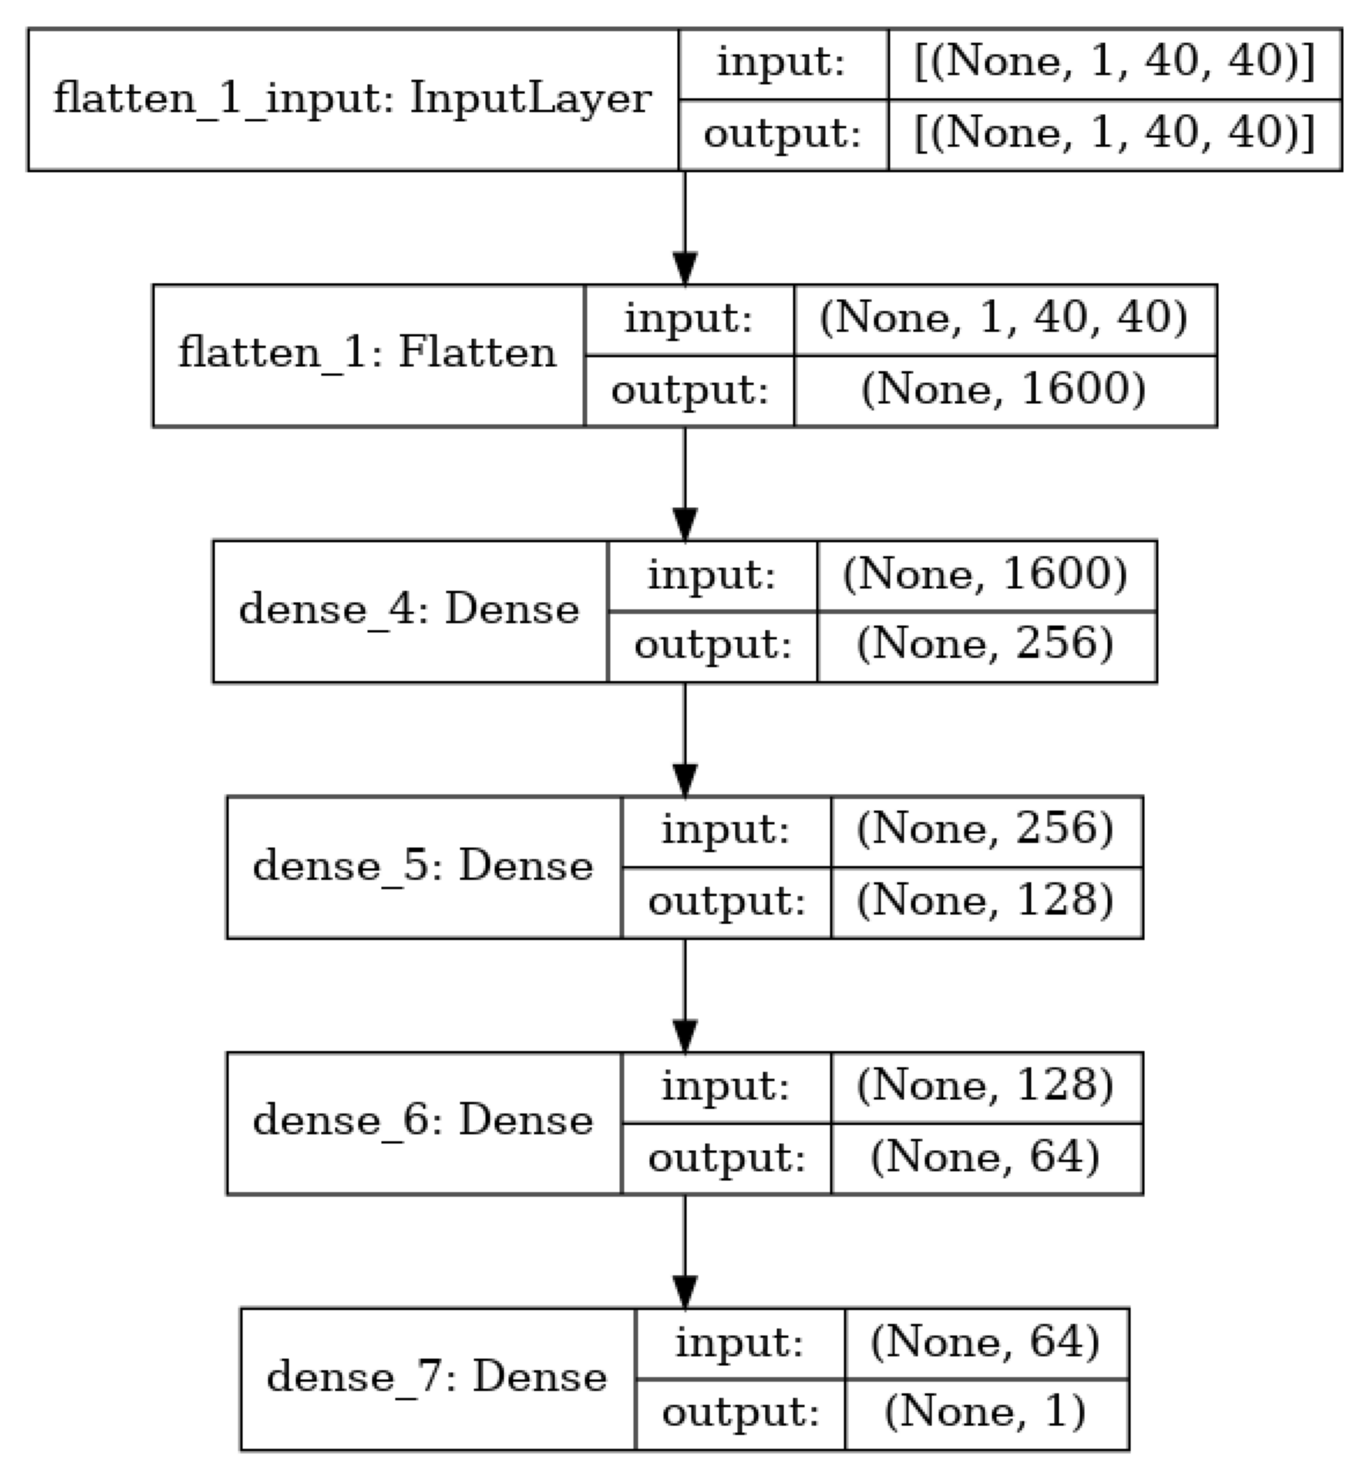

Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 0.6997 - accuracy: 0.4849 - val_loss: 0.6909 - val_accuracy: 0.5110

Epoch 00001: val_loss improved from inf to 0.69093, saving model to ./modelcheckpoint_early_stopping.h5
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6994 - accuracy: 0.4851 - val_loss: 0.6908 - val_accuracy: 0.5140

Epoch 00002: val_loss improved from 0.69093 to 0.69079, saving model to ./modelcheckpoint_early_stopping.h5
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6992 - accuracy: 0.4851 - val_loss: 0.6906 - val_accuracy: 0.5160

Epoch 00003: val_loss improved from 0.69079 to 0.69065, saving model to ./modelcheckpoint_early_stopping.h5
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6990 - accuracy: 0.4856 - val_loss: 0.6905 - val_accuracy: 0.5190

Epoch 00004: val_loss improved from 0.69065 to 0.69051, saving model to ./modelcheckpoint_early_stopping.h5
Epo

In [8]:
#############################################################################
#Code for 1.3
# 
##############################################################################
# Please code in this cell


"""
Import TensorFlow Packages
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.optimizers import Adadelta
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import matplotlib.image as img

"""
Define Model 
"""
model2 = Sequential()
model2.add(Flatten(input_shape=(1,40,40)))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])



"""
Print Architecture
"""
print(model2.summary())
fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('model_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()


"""
Model Training
"""
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                    min_delta=0.005,
                                    patience=20,
                                    mode="auto",
                                    baseline=None,
                                    restore_best_weights=False),
    tf.keras.callbacks.CSVLogger("./early_stopping_log.csv"),
    tf.keras.callbacks.ModelCheckpoint(filepath= "./modelcheckpoint_early_stopping.h5",
                                        save_best_only=True,
                                        verbose=1)
]

rec2 = model2.fit(x_train_jet, target_train, epochs=500, batch_size=512,
                validation_data=(x_val_jet, target_val),
                 callbacks=my_callbacks)

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model2.evaluate(x_train_jet, target_train)))
print('Performance (target)')
print('Loss: %.5f, Acc: %.5f' % tuple(model2.evaluate(x_val_jet, target_val)))    



"""
Save Model
"""
model2.save("model_DNN_early_stopping.h5")

##############################################################################


---

### 1.4

Learning Curve

* Please make a learning curve of the DNN from 1.3
    * Please use `early_stopping_log.csv` for this part
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

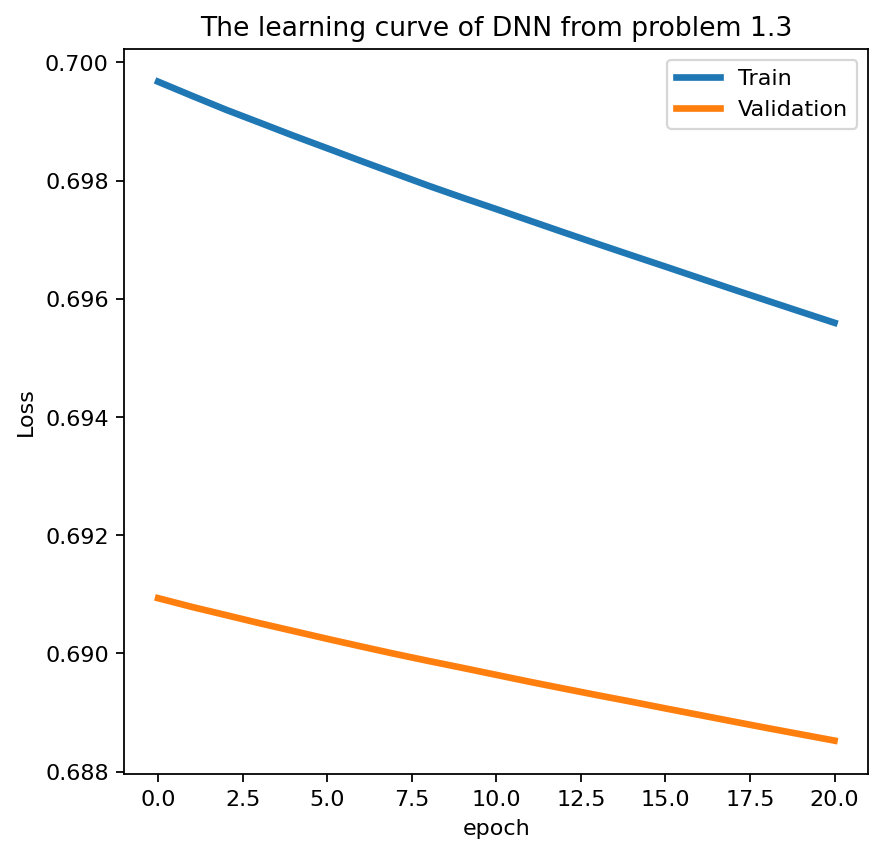

In [9]:
##############################################################################
# Code for 1.4
# 
##############################################################################
# Please code in this cell

# load the data using pandas
dataset_stop = pd.read_csv("./early_stopping_log.csv")

# Plot showing the evolution of loss and accuracy, comparing the training and the test samples.
fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of DNN from problem 1.3")
plt.plot(dataset_stop['loss'], lw=3, label='Train')
plt.plot(dataset_stop['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



##############################################################################

---

### 1.5
***NOTE: You should import any package you need in this cell***  

**This time, we will use Dropout to prevent overtaining.**

* The model architecture is the same as cell 1.1.
* Please add a **Dropout** layer before output layer with dropout rate = 0.1
        * input_shape = (1,40,40) -> (Flatten() -> Dense(256) -> Dense(128) -> Dense(64)  -> Dropout(0.1)-> Dense(1))  
* Please visualize or print your Architecture.
* Please add a cllback for `CSVLogger` and set
        * CSVLogger("./dropout_log.csv")
* Train this architecture again.
    * let batch_size and epochs be the same as cell 1.1
    
* Please save your model and name it to be `model_DNN_Dropout.h5`.
   

[Ref: Save and load Keras models](https://www.tensorflow.org/guide/keras/save_and_serialize)  
[Ref: Dropout Keras api](https://keras.io/api/layers/regularization_layers/dropout/)   
[Ref: A Gentle Introduction to Dropout for Regularizing Deep Neural Networks](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
________________________________________________

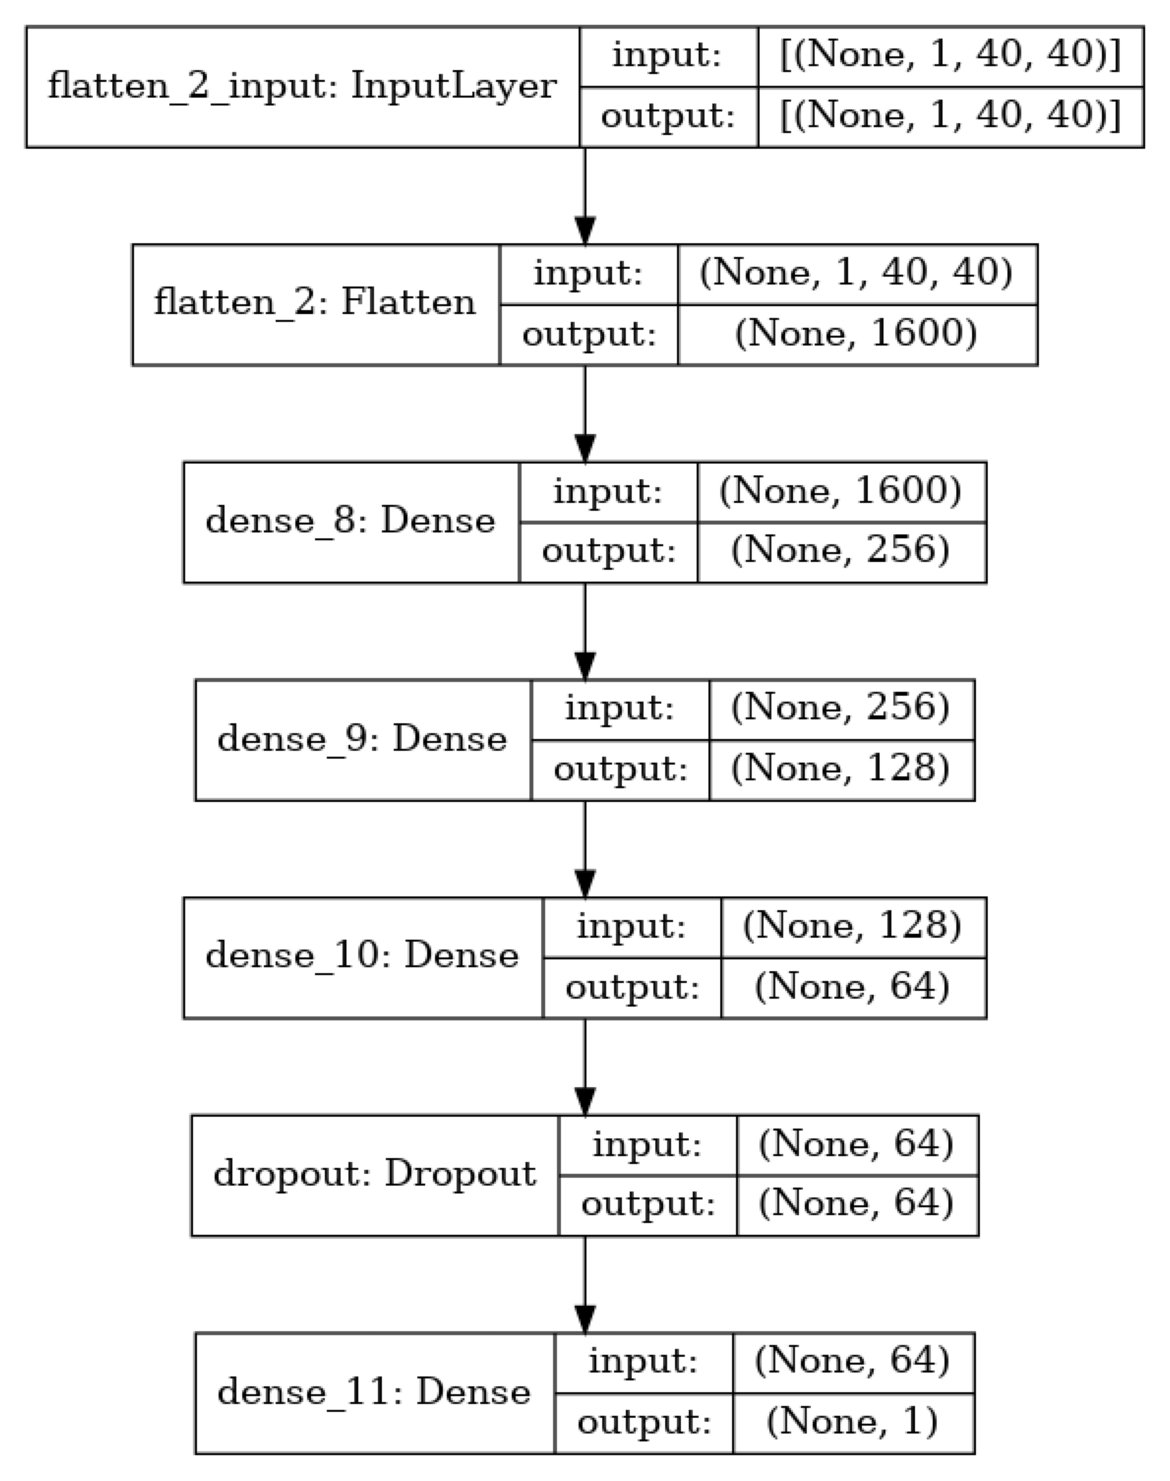

Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 0.6981 - accuracy: 0.5244 - val_loss: 0.6895 - val_accuracy: 0.5420
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6985 - accuracy: 0.5283 - val_loss: 0.6893 - val_accuracy: 0.5380
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.5221 - val_loss: 0.6890 - val_accuracy: 0.5410
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.5290 - val_loss: 0.6888 - val_accuracy: 0.5420
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.5255 - val_loss: 0.6886 - val_accuracy: 0.5470
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6989 - accuracy: 0.5289 - val_loss: 0.6883 - val_accuracy: 0.5490
Epoch 7/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6971 - accuracy: 0.5356 - val_loss: 0.6882 - val_accuracy: 0.5500
Epoch 8/500


In [10]:
%%time
##############################################################################
# Code for 1.5
# 
##############################################################################
# Please code in this cell

"""
Import TensorFlow Packages
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout
from tensorflow.keras.optimizers import Adadelta
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import matplotlib.image as img

"""
Define Model 
"""
model3 = Sequential()
model3.add(Flatten(input_shape=(1,40,40)))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])



"""
Print Architecture
"""
print(model3.summary())
fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('model_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()


"""
Model Training
"""
#     tf.keras.callbacks.EarlyStopping(monitor="val_loss",
#                                     min_delta=0.005,
#                                     patience=20,
#                                     mode="auto",
#                                     baseline=None,
#                                     restore_best_weights=False),
#     tf.keras.callbacks.ModelCheckpoint(filepath= "./modelcheckpoint_early_stopping.h5",
#                                     save_best_only=True,
#                                     verbose=1)

my_callbacks = [tf.keras.callbacks.CSVLogger("./dropout_log.csv")]

rec3 = model3.fit(x_train_jet, target_train, epochs=500, batch_size=512,
                validation_data=(x_val_jet, target_val),
                 callbacks=my_callbacks)

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model3.evaluate(x_train_jet, target_train)))
print('Performance (target)')
print('Loss: %.5f, Acc: %.5f' % tuple(model3.evaluate(x_val_jet, target_val)))    



"""
Save Model
"""
model3.save("model_DNN_Dropout.h5")

##############################################################################

---

### 1.6

Learning Curve

* Please make a learning curve of the DNN from 1.5
    * Please use `dropout_log.csv` for this part
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

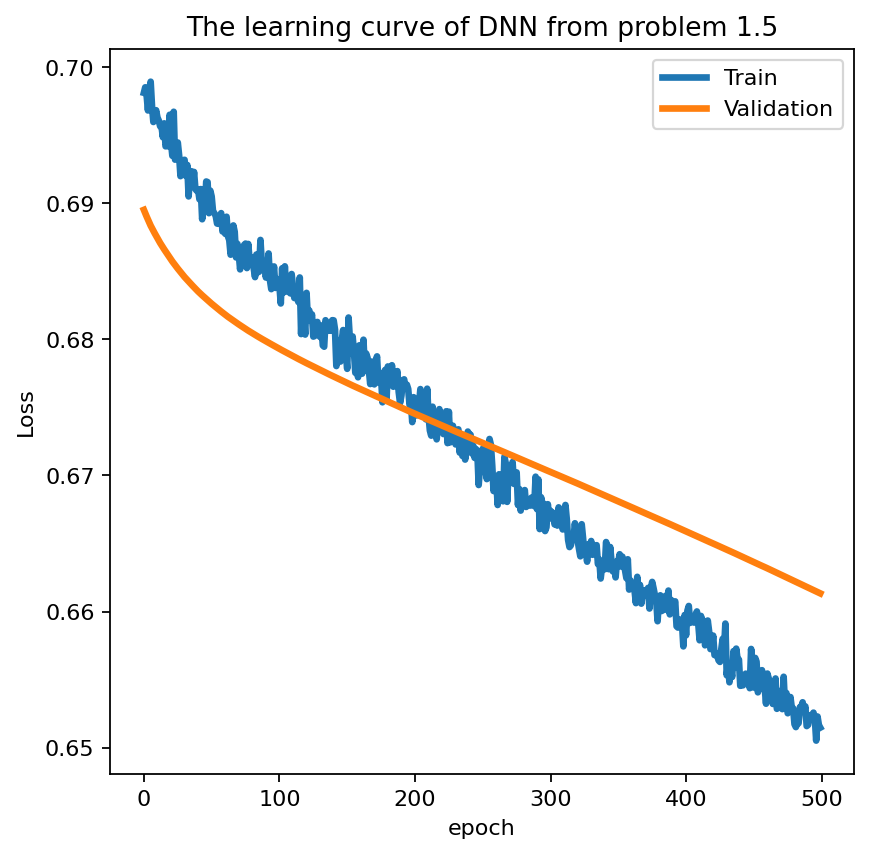

In [11]:
##############################################################################
# Code for 1.6
# 
##############################################################################
# Please code in this cell

# load the data using pandas
dataset_drop = pd.read_csv("./dropout_log.csv")

# Plot showing the evolution of loss and accuracy, comparing the training and the test samples.
fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of DNN from problem 1.5")
plt.plot(dataset_drop['loss'], lw=3, label='Train')
plt.plot(dataset_drop['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

##############################################################################

---

###  1.7
***NOTE: You should import any package you need in this cell***  

**This time, we will try to add `Regularization` term for kernel.**

* The model architecture is the same as cell 1.1.
* Please add a **regularizer** for the last 64 neurons layer which is just before the output layer
        * input_shape = (1,40,40) -> (Flatten() -> Dense(256) -> Dense(128) -> Dense(64) + regularizer -> Dense(1))  
        * your regularizer will be like ***kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0)***
* Please visualize or print your Architecture.
* Please add a cllback for `CSVLogger` and set
        * CSVLogger("./regularization_log.csv")
* Train this architecture again.
    * let batch_size and epochs be the same as cell 1.1
    
* Please save your model and name it to be `model_DNN_regularization.h5`.
   



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               409856    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
None


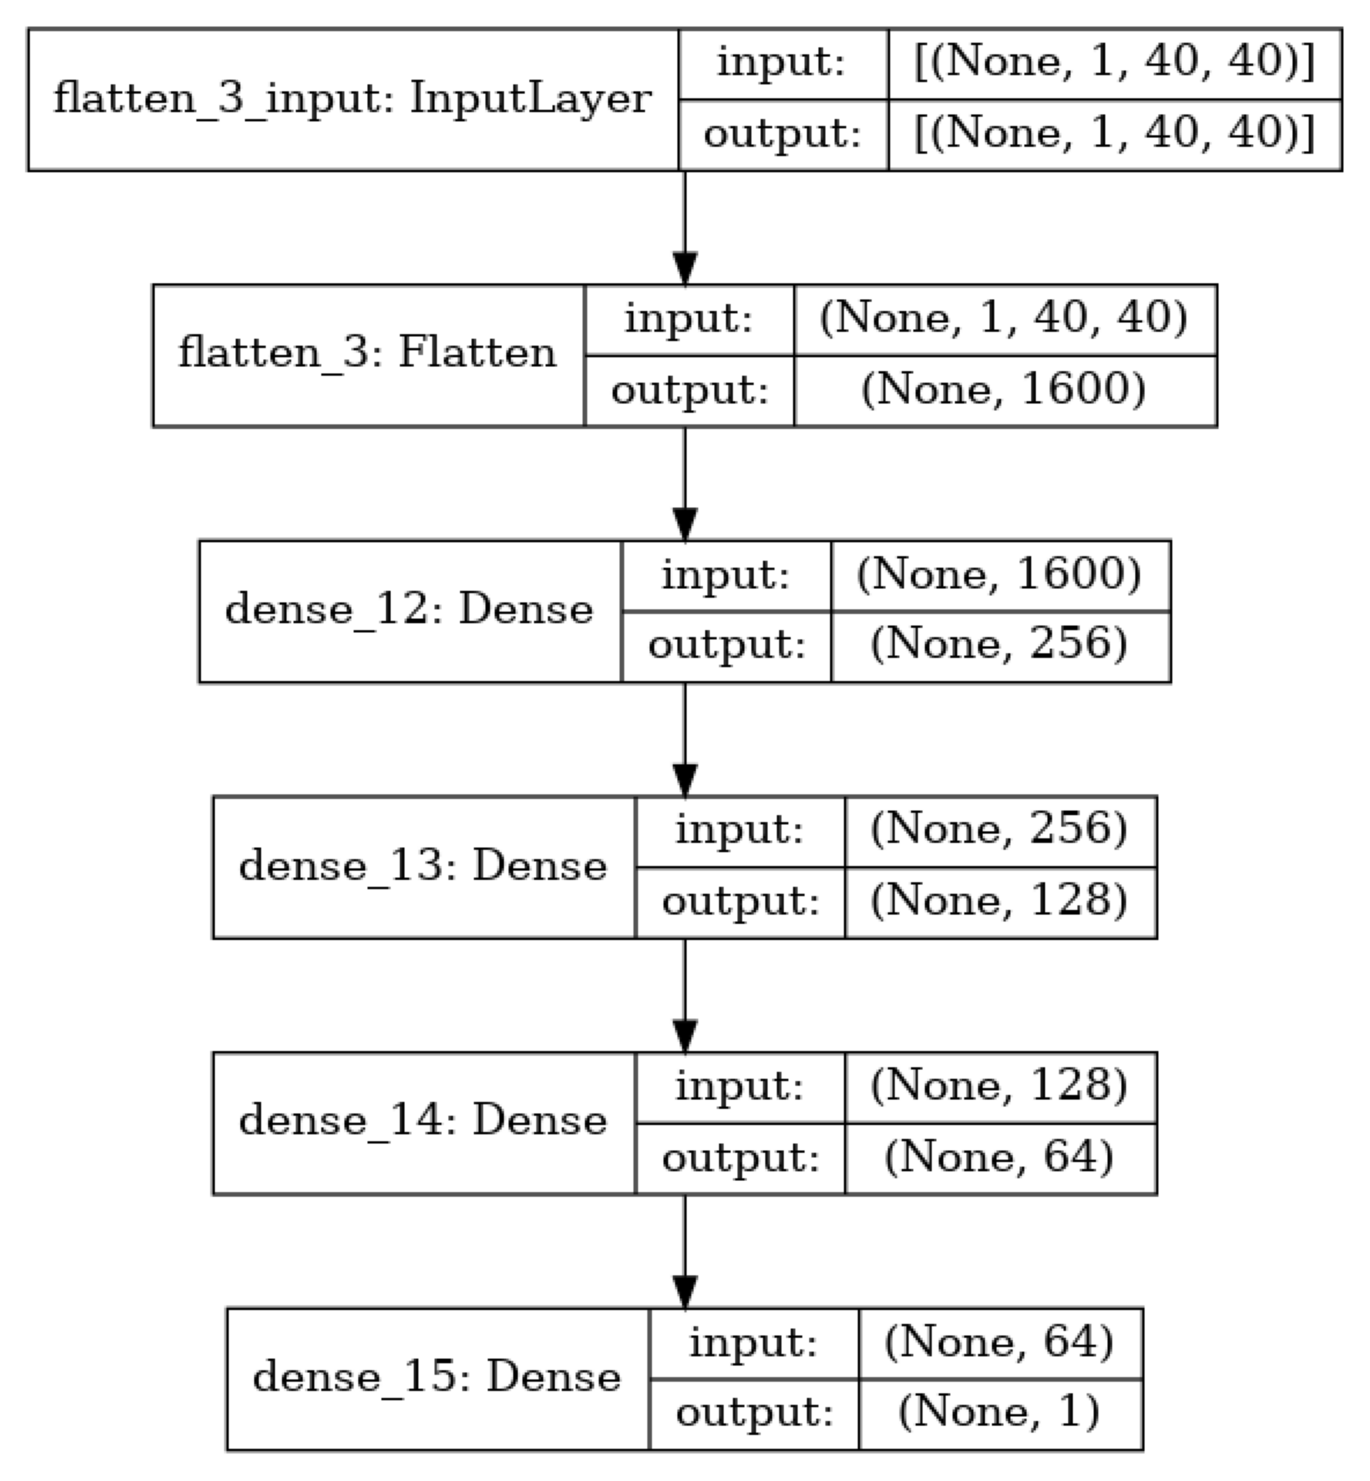

Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 8.0753 - accuracy: 0.5070 - val_loss: 8.0832 - val_accuracy: 0.4940
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 8.0710 - accuracy: 0.5071 - val_loss: 8.0787 - val_accuracy: 0.4960
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 8.0666 - accuracy: 0.5066 - val_loss: 8.0742 - val_accuracy: 0.4950
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 8.0623 - accuracy: 0.5067 - val_loss: 8.0696 - val_accuracy: 0.4970
Epoch 5/500
20/20 [==============================] - 0s 6ms/step - loss: 8.0579 - accuracy: 0.5064 - val_loss: 8.0652 - val_accuracy: 0.4980
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 8.0536 - accuracy: 0.5068 - val_loss: 8.0607 - val_accuracy: 0.5000
Epoch 7/500
20/20 [==============================] - 0s 7ms/step - loss: 8.0493 - accuracy: 0.5067 - val_loss: 8.0561 - val_accuracy: 0.5010
Epoch 8/500


In [12]:
%%time
##############################################################################
# Code for 1.7
# 
##############################################################################
# Please code in this cell

"""
Import TensorFlow Packages
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import matplotlib.image as img

"""
Define Model 
"""
model4 = Sequential()
model4.add(Flatten(input_shape=(1,40,40)))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0)))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])



"""
Print Architecture
"""
print(model4.summary())
fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('model_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()


"""
Model Training
"""
#     tf.keras.callbacks.EarlyStopping(monitor="val_loss",
#                                     min_delta=0.005,
#                                     patience=20,
#                                     mode="auto",
#                                     baseline=None,
#                                     restore_best_weights=False),
#     tf.keras.callbacks.ModelCheckpoint(filepath= "./modelcheckpoint_early_stopping.h5",
#                                     save_best_only=True,
#                                     verbose=1)

my_callbacks = [tf.keras.callbacks.CSVLogger("./regularization_log.csv")]

rec4 = model4.fit(x_train_jet, target_train, epochs=500, batch_size=512,
                validation_data=(x_val_jet, target_val),
                 callbacks=my_callbacks)

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model4.evaluate(x_train_jet, target_train)))
print('Performance (target)')
print('Loss: %.5f, Acc: %.5f' % tuple(model4.evaluate(x_val_jet, target_val)))    



"""
Save Model
"""
model4.save("model_DNN_regularization.h5")


##############################################################################

---

### 1.8

Learning Curve

* Please make a learning curve of the DNN from 1.7
        * Please use `regularization_log.csv` for this part
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

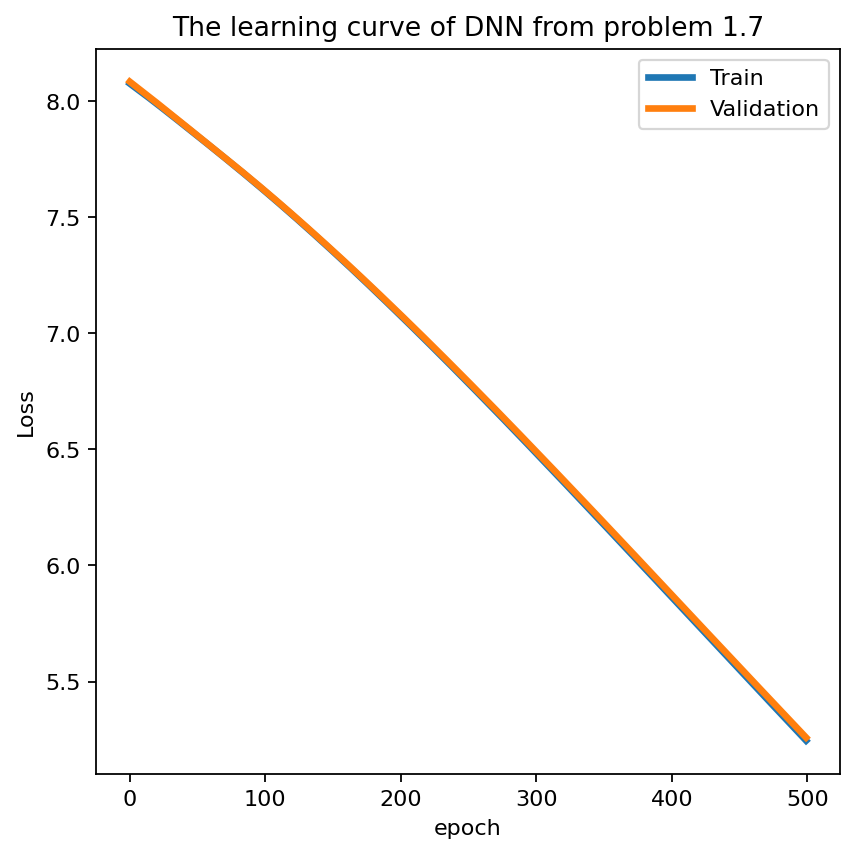

In [13]:
##############################################################################
# Code for 1.8
# 
##############################################################################
# Please code in this cell

# load the data using pandas
dataset_drop = pd.read_csv("./regularization_log.csv")

# Plot showing the evolution of loss and accuracy, comparing the training and the test samples.
fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of DNN from problem 1.7")
plt.plot(dataset_drop['loss'], lw=3, label='Train')
plt.plot(dataset_drop['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


##############################################################################

---

### 1.9

**In the machine learning, hyperparameter tuning is a important part.   
The best hyperparameter configuration can get you the best performance.   
Traditionally, you can use grid search method to find the best set.   
However, it will tak you so much time to setup each grid.  
Now, `KerasTuner` can help you to setup the hyperparameter tuning precedure, easily.**


* Please read the following reference to learn how to implement  **KerasTuner**.
* Please define your model followed the setting below
    * Example:
    ```
    def DNN_Model(hp):

        model_DNN = Sequential(name = "Model_DNN_keras_tuner")
        input_shape = (1,40,40)
        model_DNN.add(Input(shape=input_shape, name = 'input'))
        model_DNN.add(Flatten(name = 'flatten'))
        for i in range(hp.Int("num_layers", min_layers, max_layers)):
             model_DNN.add(keras.layers.Dense(........),......)    
            
        ...........   
        
        model_DNN.add(Dense(1, activation='sigmoid'))
        
        learning_rate = hp.Float("lr", .............)
        model_opt = keras.optimizers.Adam(learning_rate=learning_rate)
        model_DNN.compile(loss="binary_crossentropy",
                                  optimizer=model_opt,
                                  metrics=['accuracy'])

        return model_DNN
       ```
* Setting:
    * Middle layers
        * Scan number of layers: 1~6 layers
        * Scan number of neurons: min_value=32, max_value=1024, step=32
        * Scan activation function: relu, tanh, sigmoid
    * After adding middle layers, please add a **Boolean** argument for Dropout layer with rate=0.1
    * The output layer is one neuron with activation='sigmoid'
    * Use **Adam** to be optimizer and scan the learning rate: min_value=1e-5, max_value=1e-2, sampling="log" 
    * **binary_crossentropy** is the loss function
    * Use **RandomSearch** to do hyperparameter tuning and let
        * hypermodel= **YOUR-Defined-MODEL**
        * objective="val_loss"
        * max_trials=10,
        * executions_per_trial=1, #The number of models that should be built and fit for each trial
        * overwrite=True,
        * directory="DNN_Model_Hyper_Tuning",
        * project_name="DNN"
        
* Start the search and get the best model:
    * Let epochs be the same as cell 1.1
    * Please visualize or print the architecture of the best model.
    * Please save the best model and name it to be `model_DNN_keras_tuner.h5`.


[Ref: KerasTuner](https://keras.io/keras_tuner/)  
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)

Trial 10 Complete [00h 08m 16s]
val_loss: 0.5985807180404663

Best val_loss So Far: 0.5536993145942688
Total elapsed time: 01h 21m 45s


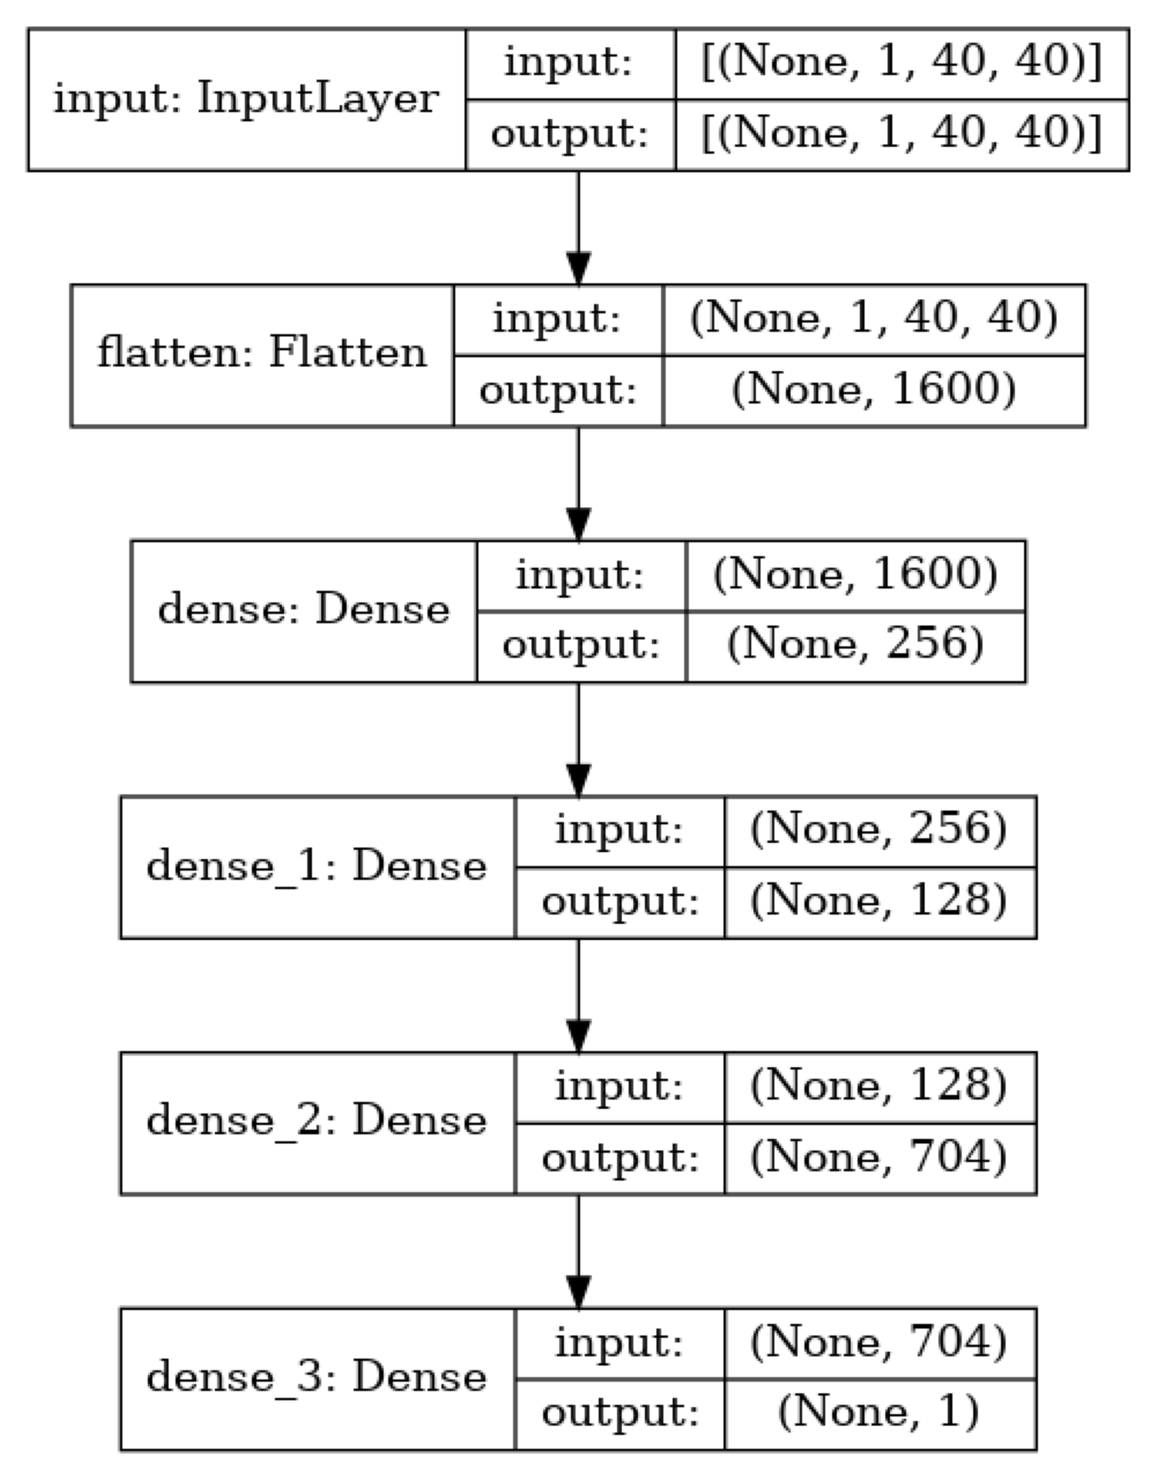

CPU times: user 1h 38min 11s, sys: 8min 56s, total: 1h 47min 7s
Wall time: 1h 21min 47s


In [14]:
%%time
#############################################################################
#Code for 1.9
# 
##############################################################################
# Please code in this cell

import keras_tuner as kt 
print("Kerase Tuner Version: ",kt.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adadelta, Adam
from tensorflow.keras import regularizers
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import matplotlib.image as img


"""
Define Model for Tuning
"""

def DNN_Model(hp):
    
    model_DNN = Sequential(name = "Model_DNN_keras_tuner")
    input_shape = (1,40,40)
    model_DNN.add(Input(shape=input_shape, name = 'input'))
    model_DNN.add(Flatten(name = 'flatten'))
    for i in range(hp.Int("num_layers", 1, 6)):
        model_DNN.add(Dense(
                            # Tune number of units separately.
                            units=hp.Int(f"units_{i}", min_value=32, max_value=1024, step=32),
                            activation=hp.Choice("activation", ["relu", "tanh", "sigmoid"])
                            )
                     )
        
    if hp.Boolean("dropout"):
        model_DNN.add(Dropout(rate=0.1))
 
    model_DNN.add(Dense(1, activation='sigmoid'))
    

    learning_rate = hp.Float("lr", min_value=1e-5, max_value=1e-2, sampling="log")
    model_opt = Adam(learning_rate=learning_rate)
    
    model_DNN.compile(loss="binary_crossentropy",
                            optimizer=model_opt,
                            metrics=['accuracy'])
    
    return model_DNN

"""
Start the search (RandomSearch, BayesianOptimization and Hyperband)
Here, we use RandomSearch
"""

tuner = kt.RandomSearch(
    DNN_Model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1, #The number of models that should be built and fit for each trial
    overwrite=True,
    directory="DNN_Model_Hyper_Tuning",
    project_name="DNN")


"""
Tuner Summary
"""
print(tuner.search_space_summary())

"""
Start Tuning
"""
tuner.search(x_train_jet, target_train, epochs=500, validation_data=(x_val_jet, target_val))
"""
Get the Best Model
"""
best_model = tuner.get_best_models()[0]

fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('model_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()
"""
Save the Best Model
"""    
best_model.save("model_DNN_keras_tuner.h5")

##############################################################################

---

### 1.10

Study Performance

* Please load your trained model `model_DNN.h5`.
* Please load your trained model `model_DNN_early_stopping.h5`.
* Please load your trained model `model_DNN_Dropout.h5`.
* Please load your trained model `model_DNN_regularization.h5`.
* Please load your trained model `model_DNN_keras_tuner.h5`.
* Please use test data set to study performance.
    * Please calculate AUC.
    * Please make a ROC figure.
    * You will put 5 curves in a figure.

AUC of model_DNN is: 0.7017001793032787
AUC of model_DNN_early_stopping is: 0.5916688012295082
AUC of model_DNN_Dropout is: 0.6902836033555328
AUC of model_DNN_regularization is: 0.678556848744877
AUC of model_DNN_keras_tuner is: 0.7803935066598362


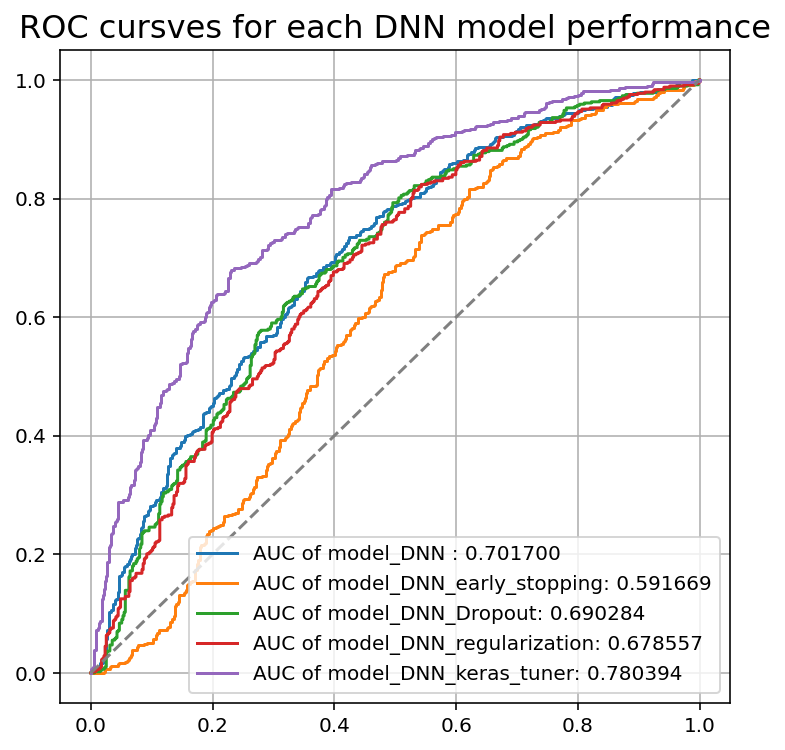

In [18]:
#############################################################################
#Code for 1.10
# 
##############################################################################
# Please code in this cell

from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
"""
ROC Curve and Confusion Matrix
"""
# loading model
m1 = load_model('model_DNN.h5')
m2 = load_model('model_DNN_early_stopping.h5')
m3 = load_model('model_DNN_Dropout.h5')
m4 = load_model('model_DNN_regularization.h5')
m5 = load_model('model_DNN_keras_tuner.h5')

target_train_np = target_train.to_numpy()
target_test_np  = target_test.to_numpy()

# roc/auc calculation
p_test1 = m1.predict(x_test_jet)[:,0]
p_test2 = m2.predict(x_test_jet)[:,0]
p_test3 = m3.predict(x_test_jet)[:,0]
p_test4 = m4.predict(x_test_jet)[:,0]
p_test5 = m5.predict(x_test_jet)[:,0]

fpr_test1, tpr_test1, thr_test1 = roc_curve(target_test_np, p_test1, pos_label=1)
roc_auc_test1 = auc(fpr_test1, tpr_test1)
print('AUC of model_DNN is:',roc_auc_test1)
fpr_test2, tpr_test2, thr_test2 = roc_curve(target_test_np, p_test2, pos_label=1)
roc_auc_test2 = auc(fpr_test2, tpr_test2)
print('AUC of model_DNN_early_stopping is:',roc_auc_test2)
fpr_test3, tpr_test3, thr_test3 = roc_curve(target_test_np, p_test3, pos_label=1)
roc_auc_test3 = auc(fpr_test3, tpr_test3)
print('AUC of model_DNN_Dropout is:',roc_auc_test3)
fpr_test4, tpr_test4, thr_test4 = roc_curve(target_test_np, p_test4, pos_label=1)
roc_auc_test4 = auc(fpr_test4, tpr_test4)
print('AUC of model_DNN_regularization is:',roc_auc_test4)
fpr_test5, tpr_test5, thr_test5 = roc_curve(target_test_np, p_test5, pos_label=1)
roc_auc_test5 = auc(fpr_test5, tpr_test5)
print('AUC of model_DNN_keras_tuner is:',roc_auc_test5)


# plot roc curve
plt.figure(figsize=(6,6))
plt.title('ROC cursves for each DNN model performance', fontsize=16)
plt.plot(fpr_test1,tpr_test1, color='C0',label = 'AUC of model_DNN : %f' %roc_auc_test1)
plt.plot(fpr_test2,tpr_test2, color='C1',label = 'AUC of model_DNN_early_stopping: %f' %roc_auc_test2)
plt.plot(fpr_test3,tpr_test3, color='C2',label = 'AUC of model_DNN_Dropout: %f' %roc_auc_test3)
plt.plot(fpr_test4,tpr_test4, color='C3',label = 'AUC of model_DNN_regularization: %f' %roc_auc_test4)
plt.plot(fpr_test5,tpr_test5, color='C4',label = 'AUC of model_DNN_keras_tuner: %f' %roc_auc_test5)
# Add a diagonal line representing the ROC from random choice
plt.plot([0, 1], [0, 1],linestyle='--', c='grey')
plt.legend(loc = 'lower right')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()


##############################################################################

---

### 1.11
Discussion for 1.10
* Please describe and compare results in cell 1.10.
---
Please write your discussion in this cell:     



Figure 1.10 shows that the keras_tuner DNN model has the best performance compare with the others models.<br>
This result tells us that the hyperparameter is important element to control the performance of model,<br>
and hyperparameter is hard to use manual control to get the better result(also respond to week6 lab).<br>
The early-stopping model shows the worst performance. We consider that<br> maybe the model cut the process to early to stop itself to get the better training.

---